![logo](logo/DaftCode_logo_854x210.jpg)

# Zajęcia 1

## Zadania z eksploracji danych

### Zadanie 1.1.

Wczytajcie dane uczące (`xtrain_1.csv` i `y_train.csv`). Zdiagnozujcie kolumny nie niosące żadnej informacji (całkowicie puste, o zerowej wariancji itp.)

In [412]:
import pandas as pd
pd.set_option('max_rows', 50000)
xtrain_1 = pd.read_csv('xtrain_1.csv',low_memory=False)
y_train = pd.read_csv('y_train.csv')

##### Sprawdzenie typu danych

In [413]:
xtrain_1.dtypes.value_counts()

object     157
float64     70
int64        6
dtype: int64

In [414]:
xtrain_1['x83336'].value_counts()

success      11123
not found     6121
Name: x83336, dtype: int64

### Zadanie 1.2. a)

Które kolumny są numeryczne a które nominalne? Ile poziomów jest w poszczególnych zmiennych nominalnych? Porównaj wartości kilku zmiennych numerycznych na boxplocie i histogramie.

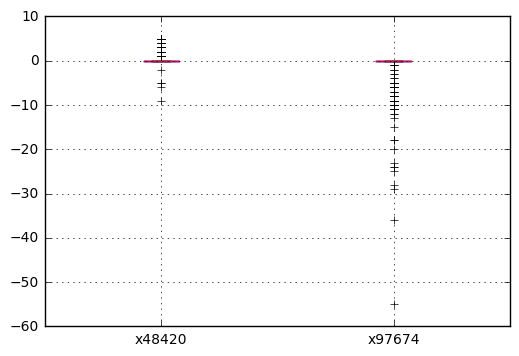

In [415]:
%matplotlib inline
xtrain_1[['x48420','x97674']].boxplot(return_type='axes')

### Zadanie 1.2 b)
Napisz funkcję, która biorąc za argument kolumnę ze zmienną nominalną, zwróci nową ramkę danych z jej reprezentacją binarną:

```
def transform_binary(col):
    # return pandas.DataFrame
```

In [416]:
def transform_binary(col):
    arr = pd.DataFrame(np.zeros((len(xtrain_1.loc[:,col]),len(xtrain_1.loc[:,col].value_counts()))))
    uniq = xtrain_1.loc[:,col].unique()
    arr.columns = np.delete(uniq,-1)
    for i in range(len(xtrain_1[col])):
        for j in range(len(uniq)-1):
            if xtrain_1[col][i] == uniq[j]:
                arr.iloc[i,j] = 1
    return arr

In [417]:
transform_binary('x83336').head()

,success,not found
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


### Zadanie 1.3.

W zbiorze danych znajdźcie kolumny zawierające format daty. Napiszcie funkcję, która zwraca nowe kolumny zawierające informacje pochodzące z tej cechy (w postaci ramki danych) i będące wartościami w zbiorze liczb $\mathbf{R}$.

```
def transform_date(col):
    # return pandas.DataFrame
```

In [418]:
from time import time
import datetime
def transform_date(col):
    time_col = xtrain_1[col]
    time_col = pd.to_datetime(time_col, format='%Y-%m-%d %H:%M:%S.%f')
    time_arr = []
    for i in range(len(time_col)):
        res = (time_col.iloc[i]-datetime.datetime(1970,1,1)).total_seconds()
        time_arr.append(res)
    time_arr = pd.DataFrame(time_arr)
    time_arr.columns = np.array([col])
    return time_arr

In [419]:
transform_date('received_at').head()

ValueError: time data '17:04.9' does match format specified

### Zadanie 1.4.

Czy dane zawierają kolumnę z informacją o języku przeglądarki? Jeśli tak, to napiszcie funkcję, która zwróci nową ramkę danych z numeryczną informacją o występowaniu danego języka.

```
def transform_lang(X):
    # return pandas.DataFrame
```

In [ ]:
def transform_lang(arg='lang'):
    lang_arr = []
    for i in range(len(xtrain_1.columns.str.contains(arg))):
        if pd.DataFrame(xtrain_1.columns.str.contains(arg)).iloc[i,0] == True:
            lang_arr.append(i)
    return xtrain_1.iloc[:,lang_arr]

In [ ]:
transform_lang().head()

### Zadanie 1.5.

Które kolumny niosą informację o kraju? Czy wszystkie wartości są zgodne?

a) Napisz funkcję, która dla danej ramki danych zwróci kolumny, w której jest nazwa kraju.

b) Napisz funkcję, która dla zadanych dwóch kolumn zwróci informację czy są zgodne.

# A

In [ ]:
def transform_country(arg='country'):
    lang_arr = []
    for i in range(len(xtrain_1.columns.str.contains(arg))):
        if pd.DataFrame(xtrain_1.columns.str.contains(arg)).iloc[i,0] == True:
            lang_arr.append(i)
    return xtrain_1.iloc[:,lang_arr]

In [10]:
transform_country().head()

,bin_country,user_ip_country,country_code
0,NaN,US,US
1,NaN,US,US
2,NaN,US,US
3,NaN,US,US
4,NaN,US,ES


# B

In [27]:
country_df = transform_country()
def valid_country(arg=0):
    country_df['valid'] = (country_df.loc[:,'user_ip_country'] == country_df.loc[:,'country_code'])
    return country_df

In [28]:
valid_country().head()

C:\Users\Adam\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,bin_country,user_ip_country,country_code,valid
0,NaN,US,US,True
1,NaN,US,US,True
2,NaN,US,US,True
3,NaN,US,US,True
4,NaN,US,ES,False


### Zadanie 1.6.

Które kolumny niosą informację o przeglądarce lub wersji systemu operacyjnego? Czy wszystkie wartości są zgodne?

In [58]:
def transform_osver(arg='browser_string'):
    lang_arr = []
    for i in range(len(xtrain_1.columns.str.contains(arg))):
        if pd.DataFrame(xtrain_1.columns.str.contains(arg)).iloc[i,0] == True:
            lang_arr.append(i)
    return xtrain_1.iloc[:,lang_arr[0]]

In [59]:
transform_osver().head()

0    Mozilla/5.0 (Linux; Android 6.0.1; Nexus 6 Bui...
1    Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKi...
2    Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
3    Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
4    Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...
Name: browser_string, dtype: object

### Zadanie 1.7
Utwórz plik `[imie]_functions.py`, w którym zbierzesz funkcje z zadań `1.1 - 1.6` w jeden moduł. W komórce poniżej przetestuj ich działanie.

   success  not found
0      1.0        0.0
1      0.0        1.0
2      1.0        0.0
3      0.0        1.0
4      1.0        0.0
    received_at
0  1.454286e+09
1  1.454286e+09
2  1.454288e+09
3  1.454289e+09
4  1.454289e+09
  browser_language headers_accept_language language
0            en-US                     NaN      NaN
1   en-US,en;q=0.8          en-US,en;q=0.8      NaN
2   en-US,en;q=0.8          en-US,en;q=0.8      NaN
3   en-US,en;q=0.8                     NaN      NaN
4   en-US,en;q=0.8          en-US,en;q=0.8      NaN
  bin_country user_ip_country country_code
0         NaN              US           US
1         NaN              US           US
2         NaN              US           US
3         NaN              US           US
4         NaN              US           ES
  bin_country user_ip_country country_code  valid
0         NaN              US           US   True
1         NaN              US           US   True
2         NaN              US           US   True
3 

C:\Users\Adam\Anaconda3\lib\site-packages\ipykernel\__main__.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0    Mozilla/5.0 (Linux; Android 6.0.1; Nexus 6 Bui...
1    Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKi...
2    Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
3    Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...
4    Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...
Name: browser_string, dtype: object


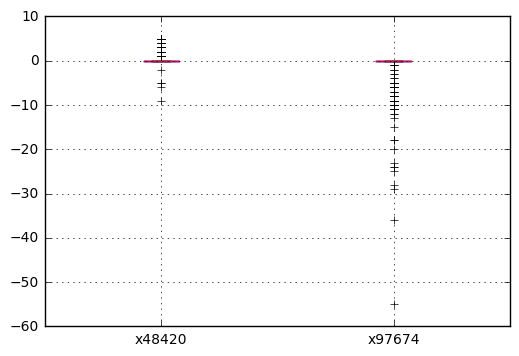

In [66]:
# %load [Kamil_Adamski]_functions.py.py
import pandas as pd
pd.set_option('max_rows', 50000)
xtrain_1 = pd.read_csv('xtrain_1.csv',low_memory=False)
y_train = pd.read_csv('y_train.csv')

%matplotlib inline
xtrain_1[['x48420','x97674']].boxplot(return_type='axes')

#1.2

def transform_binary(col):
    arr = pd.DataFrame(np.zeros((len(xtrain_1.loc[:,col]),len(xtrain_1.loc[:,col].value_counts()))))
    uniq = xtrain_1.loc[:,col].unique()
    arr.columns = np.delete(uniq,-1)
    for i in range(len(xtrain_1[col])):
        for j in range(len(uniq)-1):
            if xtrain_1[col][i] == uniq[j]:
                arr.iloc[i,j] = 1
    return arr
    
#1.3

from time import time
import datetime
def transform_date(col):
    time_col = xtrain_1[col]
    time_col = pd.to_datetime(time_col, format='%Y-%m-%d %H:%M:%S.%f')
    time_arr = []
    for i in range(len(time_col)):
        res = (time_col.iloc[i]-datetime.datetime(1970,1,1)).total_seconds()
        time_arr.append(res)
    time_arr = pd.DataFrame(time_arr)
    time_arr.columns = np.array([col])
    return time_arr
    
#1.4

def transform_lang(arg='lang'):
    lang_arr = []
    for i in range(len(xtrain_1.columns.str.contains(arg))):
        if pd.DataFrame(xtrain_1.columns.str.contains(arg)).iloc[i,0] == True:
            lang_arr.append(i)
    return xtrain_1.iloc[:,lang_arr]
    
#1.5A

def transform_country(arg='country'):
    lang_arr = []
    for i in range(len(xtrain_1.columns.str.contains(arg))):
        if pd.DataFrame(xtrain_1.columns.str.contains(arg)).iloc[i,0] == True:
            lang_arr.append(i)
    return xtrain_1.iloc[:,lang_arr]
    
#1.5B

country_df = transform_country()
def valid_country(arg=0):
    country_df['valid'] = (country_df.loc[:,'user_ip_country'] == country_df.loc[:,'country_code'])
    return country_df
    
#1.6

def transform_osver(arg='browser_string'):
    lang_arr = []
    for i in range(len(xtrain_1.columns.str.contains(arg))):
        if pd.DataFrame(xtrain_1.columns.str.contains(arg)).iloc[i,0] == True:
            lang_arr.append(i)
    return xtrain_1.iloc[:,lang_arr[0]]

print(transform_binary('x83336').head())
print(transform_date('received_at').head())
print(transform_lang().head())
print(transform_country().head())
print(valid_country().head())
print(transform_osver().head())

## Zadania dodatkowe

### Zadanie 1.8
Znajdź 10. par zmiennych numerycznych o największej korelacji.

In [141]:
import pandas as pd
import numpy as np
pd.set_option('max_rows', 50000)
xtrain_1 = pd.read_csv('xtrain_1.csv',low_memory=False)
y_train = pd.read_csv('y_train.csv')

In [116]:
xtrain_1.dtypes.value_counts()

object     157
float64     72
int64        4
dtype: int64

In [117]:
numeric_corr = xtrain_1.select_dtypes(include=[float])
#numeric_corr.head()

##### Sprawdzenie które kolumny mają tylko wartości NaN

In [118]:
import math
j = 0
countj = []
col_drop_num = []
while j < len(numeric_corr.columns):
    i = 0
    count = 0
    while i < len(numeric_corr)-17000:
        if math.isnan(np.array(numeric_corr)[i,j]) == True:
            count += 1
            countj.append(j)
            if count == len(numeric_corr)-17000:
                #print(j)
                col_drop_num.append(j)
        i += 1
    j += 1    

In [119]:
col_drop_num

[2, 17, 23, 36, 42, 49, 56, 57, 58, 59, 64, 65, 66, 67, 68, 69, 70, 71]

In [120]:
pd.Series(countj).unique()

array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71], dtype=int64)

##### Wyrzucenie kolumn, w któych występują tylko wartości NaN

In [121]:
X = numeric_corr.drop(numeric_corr.columns[col_drop_num], axis=1, inplace=True)

C:\Users\Adam\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [122]:
val = len(numeric_corr.columns)-1
X = numeric_corr.iloc[:,0:val].values

In [123]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:,0:val])
X[:,0:val] = imputer.transform(X[:,0:val])

In [124]:
numeric_corr.head()

,x48420,x97674,cc_bin_number,cc_number_hash_score,cc_number_hash_worst_score,cidr_number,custom_count_1,custom_count_2,custom_count_3,custom_count_4,...,x70806,x43300,expiration_year,expiration_month,client_status_code,transaction_amount,tcp_mss,tcp_tos,tcp_ttl,tcp_win
0,0.000000,0.000000,434769.0,0.000000,0.000000,12.271028,2.0,2.0,2.0,2.0,...,9.0,-4.0,2018.0,6.0,1.0,100.0,1436.992065,0.197565,73.746614,NaN
1,0.019689,-0.075339,533248.0,0.000601,-0.009862,12.271028,1.0,1.0,1.0,1.0,...,0.0,0.0,2018.0,2.0,1.0,100.0,1460.000000,0.000000,111.000000,8192.0
2,0.000000,0.000000,418646.0,0.000000,0.000000,12.271028,3.0,2.0,2.0,1.0,...,0.0,0.0,2017.0,2.0,1.0,100.0,1460.000000,0.000000,110.000000,8192.0
3,0.019689,-0.075339,545958.0,0.000000,0.000000,12.271028,1.0,1.0,1.0,3.0,...,0.0,-6.0,2018.0,12.0,1.0,100.0,1436.992065,0.197565,73.746614,NaN
4,0.000000,0.000000,527267.0,0.000000,0.000000,12.271028,36.0,42.0,17.0,8.0,...,0.0,0.0,2018.0,6.0,1.0,100.0,1460.000000,0.000000,112.000000,8192.0


In [125]:
for i in range(len(numeric_corr.columns)):    
    x, y = numeric_corr.iloc[ :,i].values, numeric_corr.iloc[ :,i].values
    nas = np.logical_or(x.isnan(), y.isnan())
    corr = sp.pearsonr(x[~nas], y[~nas])
    correlation.append(corr)

AttributeError: 'numpy.ndarray' object has no attribute 'isnan'

##### Tablica z indeksami do korelacji

In [316]:
from scipy.stats.stats import pearsonr
corr_arr = []
n = len(numeric_corr.columns)+1
num_index = int((n**2-n)/2)
index_arr = np.zeros((num_index+1,2))
global_counter = 0
for i in range(len(numeric_corr.columns)):
    counter = i
    while counter < len(numeric_corr.columns):
        ress = pearsonr(numeric_corr.iloc[:,i],numeric_corr.iloc[:,counter])
        corr_arr.append(ress)
        index_arr[global_counter] = i, counter
        counter += 1
        global_counter += 1
        #print(i,counter)

In [317]:
index_arr = pd.DataFrame(index_arr)
index_arr.columns = ['row_index', 'col_index']
#pd.DataFrame(index_arr).head(-1)

In [318]:
corr_arr = pd.DataFrame(corr_arr)
corr_arr.columns = ['corr', 'p-val']
#pd.DataFrame(corr_arr).head()

In [319]:
corr_df = pd.concat([index_arr,corr_arr],axis=1)
#corr_df.head()

In [320]:
result = corr_df.sort(['corr'],ascending=False)

C:\Users\Adam\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [321]:
type(result)

pandas.core.frame.DataFrame

In [325]:
tab = []
glob_c = 0
for i in range(len(result)):
    if glob_c <= 10:
        if result.iloc[i,2] != 1.0:
            tab.append(np.array(result.iloc[i]))
            glob_c += 1
tab = pd.DataFrame(tab)
tab.columns = ['row_index','col_index','corr','p-val']
tab

,row_index,col_index,corr,p-val
0,19.0,42.0,0.984438,0.0
1,20.0,43.0,0.983640,0.0
2,40.0,43.0,0.954989,0.0
3,20.0,40.0,0.949007,0.0
4,14.0,42.0,0.947748,0.0
5,14.0,19.0,0.942203,0.0
6,15.0,43.0,0.910277,0.0
7,15.0,20.0,0.904697,0.0
8,15.0,40.0,0.883761,0.0
9,12.0,17.0,0.847456,0.0


In [374]:
row_num = 0

In [375]:
numeric_corr.columns[int(tab.iloc[row_num,0])]

'input_ip_latitude'

In [376]:
numeric_corr.columns[int(tab.iloc[row_num,1])]

'x7971'

### Zadanie 1.9
Dowolną metodą znajdź 10. par najbardziej zależnych od siebie zmiennych nominalnych.

In [ ]:
str_corr = xtrain_1.select_dtypes(include=[str])

In [143]:
xtrain_1.head()

,x72496,x32520,x46219,x97734,x98434,x13664,x83336,x48420,x97674,agent_type,...,navigatorproductsub,navigatorappcodename,language,useragent,donottrack,timezoneoffset,navigatorplatform,navigatorjavaenabled,navigatorcookieenabled,parsed_user_agent
0,NaN,NaN,2016-01-30,NaN,2016-02-01,2016-02-01,success,0.0,0.0,browser_mobile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,not found,NaN,NaN,browser_computer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2015-12-04,NaN,2016-02-01,2016-02-01,success,0.0,0.0,browser_computer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,not found,NaN,NaN,browser_computer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,2014-09-28,NaN,2016-02-01,2016-02-01,success,0.0,0.0,browser_computer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
0,1,6,9,11,12,13,15,18,19,20,21,22,27,

In [248]:
counter = 0
for i in cols:
    if i == 'headers_name_value_hash':
        print(counter)
    counter += 1

71


In [345]:
xtrain_1.loc[:,'x46383'].unique()

array([ -96.81423, -117.29898,  -84.49769, ..., -118.0793 ,  -85.48486,
        -73.93955])

In [313]:
cols = xtrain_1.columns
num_cols = xtrain_1._get_numeric_data().columns
cat_var = list(set(cols) - set(num_cols) - set(['input_ip_first_seen','headers_name_value_hash','navigatorappversion','x72496',
                                                'x68280','x40007','x55586','browser_string_hash','x66439','x98434','js_browser',
                                               'x42420','input_ip_assert_history','headers_accept','x52094','x39150',
                                               'x33709','x3370','x21202','x85112','input_ip_last_update','x42973']))
cat_var

['x58838',
 'x73629',
 'x5290',
 'cc_bin_number_geo',
 'x5170',
 'donottrack',
 'input_ip_geo',
 'x92166',
 'x5193',
 'x96255',
 'dns_ip_region',
 'cc_bin_number_org',
 'headers_accept_encoding',
 'navigatorappname',
 'transaction_currency',
 'user_ip_country',
 'dns_ip_geo',
 'os',
 'request_result',
 'x76585',
 'session_id',
 'x13872',
 'browser_string',
 'x5342',
 'user_ip_address',
 'x76409',
 'x12050',
 'x80385',
 'x87611',
 'country_code',
 'x92645',
 'navigatorvendor',
 'received_at',
 'browser_language',
 'x46567',
 'x84525',
 'risk_rating',
 'x9789',
 'agent_type',
 'dns_ip_organization',
 'x44566',
 'headers_order_string_hash',
 'x97734',
 'input_ip_organization',
 'card_type',
 'name',
 'tcp_os_name',
 'headers_connection',
 'input_ip_last_event',
 'x71182',
 'x83032',
 'x18591',
 'cc_bin_number_brand',
 'x92221',
 'browser_version',
 'cc_number_hash_assert_history',
 'x80911',
 'cc_bin_number_category',
 'input_ip_attributes',
 'x83336',
 'browser',
 'navigatorcookieenabled